In [7]:
# pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
names=['model','option','year','odometer','fuel','price']
avante = pd.read_csv('../data/avante_df.csv')
genesis = pd.read_csv('../data/genesis_df.csv')
grandure = pd.read_csv('../data/grandure_df.csv')
sonata = pd.read_csv('../data/sonata_df.csv')
santafe = pd.read_csv('../data/santafe_df.csv')

avante = pd.DataFrame(data=avante).reset_index().iloc[:,2:]
genesis = pd.DataFrame(genesis).reset_index().iloc[:,2:]
grandure = pd.DataFrame(grandure).reset_index().iloc[:,2:]
sonata = pd.DataFrame(sonata).reset_index().iloc[:,2:]
santafe = pd.DataFrame(santafe).reset_index().iloc[:,2:]

dfs=[avante,genesis,grandure,sonata,santafe]
# dfs_names=['avante_df','genesis_df','grandure_df','sonata_df','santafe_df']
train = pd.concat(dfs,axis=0)
train

,model,option,year,odometer,fuel,price,car
0,아반떼 AD,1.6 GDI 밸류 플러스,18/02식,46374,가솔린,1300,avante
1,더 뉴 아반떼,1.6 GDi 스마트 기본형,14/05식,78255,가솔린,880,avante
2,아반떼 AD,1.6 GDI 스타일,16/12식(17년형),60873,가솔린,1199,avante
3,아반떼 AD,1.6 GDI 밸류 플러스,18/02식,46374,가솔린,1300,avante
4,아반떼 MD,M16 GDI 럭셔리,12/08식,93310,가솔린,660,avante
...,...,...,...,...,...,...,...
3809,싼타페 DM,디젤(e-VGT) 2.0 2WD 익스클루시브,14/07식(15년형),78199,디젤,1470,santafe
3810,싼타페 TM,디젤 2.0 2WD 익스클루시브,18/02식(19년형),40533,디젤,2580,santafe
3811,싼타페 DM,디젤(e-VGT) 2.0 2WD 익스클루시브,12/09식(13년형),133200,디젤,1350,santafe
3812,싼타페 DM,디젤(e-VGT) 2.0 2WD 프리미엄,14/03식(15년형),83132,디젤,1660,santafe


In [2]:
# only one-hot encoding

In [3]:
from tensorflow.keras.utils import to_categorical
train_df = pd.get_dummies(train, columns =['model','option','year','fuel','car'])
train_df

,odometer,price,model_EF 쏘나타,model_EQ900,model_G70,model_G80,model_G80 (RG3),model_G90,model_G90 (RS4),model_GV60,...,fuel_가솔린+CNG,fuel_가솔린+LPG,fuel_가솔린+전기,fuel_디젤,fuel_전기,car_avante,car_genesis,car_grandure,car_santafe,car_sonata
0,46374,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,78255,880,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60873,1199,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,46374,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,93310,660,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,78199,1470,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3810,40533,2580,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3811,133200,1350,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3812,83132,1660,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
from sklearn import datasets, preprocessing
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(train_df.drop('price',axis=1), train_df['price'],
                                                                                 test_size=0.2,
                                                                                 random_state=0)
train_data.shape, test_data.shape, train_label.shape, test_label.shape

((24467, 1104), (6117, 1104), (24467,), (6117,))

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# min_max normalization
# copy the data
train_scaled = train_data.copy()
test_scaled = test_data.copy()
train_label_scaled = train_label.copy()
test_label_scaled = test_label.copy()
# apply normalization techniques
# for column in train_scaled.columns:
#     train_scaled[column] = (train_scaled[column] - train_scaled[column].min()) / (train_scaled[column].max() - train_scaled[column].min())
#     test_scaled[column] = (test_scaled[column] - test_scaled[column].min()) / (test_scaled[column].max() - test_scaled[column].min())


In [6]:
# StandardScaler
# std_scaler = StandardScaler()
# train_std = std_scaler.fit_transform(train_scaled)
# test_std = std_scaler.transform(test_scaled)

# train_label_std = std_scaler.fit_transform(train_label_scaled.values.reshape(-1,1))
# test_label_std = std_scaler.transform(test_label_scaled.values.reshape(-1,1))


In [23]:
# MinMaxsScaler
mm_scaler = MinMaxScaler()
train_std = mm_scaler.fit_transform(train_scaled)
test_std = mm_scaler.transform(test_scaled)

train_label_std = mm_scaler.fit_transform(train_label_scaled.values.reshape(-1,1))
test_label_std = mm_scaler.transform(test_label_scaled.values.reshape(-1,1))


In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [26]:
model = models.Sequential()

model.add(layers.Dense(input_dim=1104, units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=2048, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

# model.add(layers.Dense(units=1024, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('elu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

# model.add(layers.Dense(units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('elu'))
# model.add(layers.Dropout(rate=0.4))

# model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('elu'))

model.add(layers.Dense(units=1, activation=None))

In [27]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.mean_squared_error, 
              metrics=[metrics.mean_squared_error])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               565760    
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 2048)              1050624   
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 2048)             

In [29]:
history = model.fit(train_std, train_label, batch_size=1000, epochs=200, validation_split=0.3, verbose=0)

In [30]:
result = model.evaluate(test_std, test_label)

print('loss (mean_squared_error) :', result[0])

192/192 [==============================] - 2s 8ms/step - loss: 485916.0625 - mean_squared_error: 485916.0625
loss (mean_squared_error) : 485916.0625


In [31]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

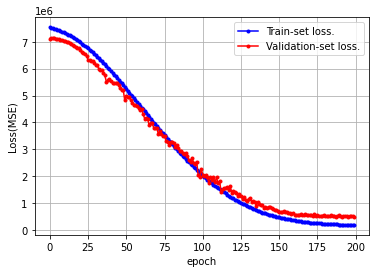

In [32]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

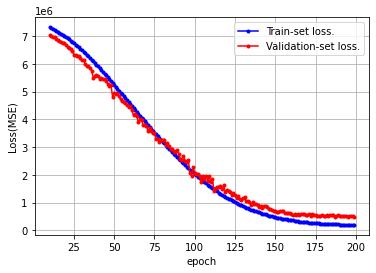

In [33]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len[10:], loss[10:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[10:], val_loss[10:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

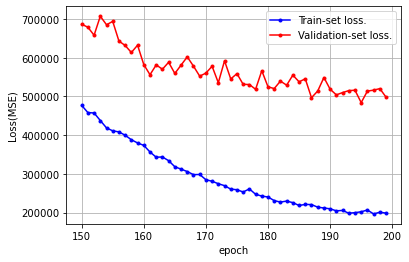

In [34]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len[150:], loss[150:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[150:], val_loss[150:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [35]:
# Calling `save('DL_model')` creates a SavedModel folder `DL_model`.
model.save("DL_model")



INFO:tensorflow:Assets written to: DL_model/assets


In [36]:
# It can be used to reconstruct the model identically.
reconstructed_model = models.load_model("DL_model")

# Let's check:
np.testing.assert_allclose(
    model.predict(test_std), reconstructed_model.predict(test_std)
)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
# reconstructed_model.fit(test_std, test_label)

192/192 [==============================] - 1s 6ms/step


In [37]:
result = reconstructed_model.evaluate(test_std, test_label)

print('loss (mean_squared_error) :', result[0])

192/192 [==============================] - 2s 7ms/step - loss: 485916.0625 - mean_squared_error: 485916.0625
loss (mean_squared_error) : 485916.0625


In [43]:
test_std[0].shape

(1104,)

In [50]:
ex = [0] * 1104
np.array(ex).reshape(1,-1)

array([[0, 0, 0, ..., 0, 0, 0]])

In [51]:
reconstructed_model.predict(np.array(ex).reshape(1,-1))

1/1 [==============================] - 0s 96ms/step


array([[3989.6526]], dtype=float32)

In [56]:
test_std[0:1].shape

(1, 1104)

In [57]:
train_df

,odometer,price,model_EF 쏘나타,model_EQ900,model_G70,model_G80,model_G80 (RG3),model_G90,model_G90 (RS4),model_GV60,...,fuel_가솔린+CNG,fuel_가솔린+LPG,fuel_가솔린+전기,fuel_디젤,fuel_전기,car_avante,car_genesis,car_grandure,car_santafe,car_sonata
0,46374,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,78255,880,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60873,1199,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,46374,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,93310,660,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,78199,1470,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3810,40533,2580,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3811,133200,1350,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3812,83132,1660,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [61]:
train_df.to_csv('./train_df.csv')

In [66]:
train_df2 = pd.DataFrame(pd.read_csv('./train_df.csv')).iloc[:,1:]
train_df2

,odometer,price,model_EF 쏘나타,model_EQ900,model_G70,model_G80,model_G80 (RG3),model_G90,model_G90 (RS4),model_GV60,...,fuel_가솔린+CNG,fuel_가솔린+LPG,fuel_가솔린+전기,fuel_디젤,fuel_전기,car_avante,car_genesis,car_grandure,car_santafe,car_sonata
0,46374,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,78255,880,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60873,1199,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,46374,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,93310,660,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30579,78199,1470,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30580,40533,2580,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30581,133200,1350,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30582,83132,1660,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [77]:
cols = list(train_df2.drop('price',axis=1).columns)
cols

['odometer',
 'model_EF 쏘나타',
 'model_EQ900',
 'model_G70',
 'model_G80',
 'model_G80 (RG3)',
 'model_G90',
 'model_G90 (RS4)',
 'model_GV60',
 'model_GV70',
 'model_GV80',
 'model_LF 쏘나타',
 'model_LF 쏘나타 하이브리드',
 'model_NF 쏘나타',
 'model_NF 쏘나타 트랜스폼',
 'model_YF 쏘나타',
 'model_그랜저',
 'model_그랜저 HG',
 'model_그랜저 HG 하이브리드',
 'model_그랜저 IG',
 'model_그랜저 IG 하이브리드',
 'model_그랜저 TG',
 'model_그랜저 XG',
 'model_그랜저 뉴 럭셔리',
 'model_뉴 EF 쏘나타',
 'model_뉴 그랜저',
 'model_뉴 그랜저 XG',
 'model_뉴 아반떼 XD',
 'model_더 뉴 G70',
 'model_더 뉴 그랜저 IG',
 'model_더 뉴 그랜저 IG 하이브리드',
 'model_더 뉴 싼타페',
 'model_더 뉴 아반떼',
 'model_더 뉴 아반떼 AD',
 'model_더 럭셔리 그랜저',
 'model_싼타페',
 'model_싼타페 CM',
 'model_싼타페 DM',
 'model_싼타페 TM',
 'model_싼타페 더 프라임',
 'model_쏘나타',
 'model_쏘나타 (DN8)',
 'model_쏘나타 II',
 'model_쏘나타 III',
 'model_쏘나타 뉴 라이즈',
 'model_쏘나타 뉴 라이즈 하이브리드',
 'model_쏘나타 더 브릴리언트',
 'model_쏘나타 하이브리드',
 'model_쏘나타 하이브리드 (DN8)',
 'model_아반떼 (CN7)',
 'model_아반떼 AD',
 'model_아반떼 HD',
 'model_아반떼 MD',
 'model_아반떼 XD',
 'model_아반떼

In [97]:
ipt = ['sonata','EF 쏘나타','1.6 터보 마이 시티 에디션','00/01식','LPG(일반인 구입)']
vname = 'genesis'
vmodel = 'EF 쏘나타'
voption = '1.6 터보 마이 시티 에디션'
vyear = '00/01식'
ftype = 'LPG(일반인 구입)'
odometer = 100

# if 'car_'+vname in cols:
#     print('true')
#     print(cols.index('car_'+vname))
#     temp[cols.index('car_'+vname)] = 1
#     print(temp[1100:])
# else:
#     print('false')
print(cols.index('car_'+vname))
print(cols.index('model_'+vmodel))
print(cols.index('option_'+voption))
print(cols.index('year_'+vyear))
print(cols.index('fuel_'+ftype))
temp = [0] * 1104
odometer_MinMax = (odometer - train_df['odometer'].min(axis=0)) / (train_df['odometer'].max(axis=0) - train_df['odometer'].min(axis=0))
temp[0] = odometer_MinMax
temp[cols.index('car_'+vname)] =1
temp[cols.index('model_'+vmodel)] =1
temp[cols.index('option_'+voption)] =1
temp[cols.index('year_'+vyear)] =1
temp[cols.index('fuel_'+ftype)] =1

sum(temp)

1100
1
129
677
1091


5.000141451405727

In [98]:
reconstructed_model.predict(np.array(temp).reshape(1,-1))

1/1 [==============================] - 0s 15ms/step


array([[2044.0522]], dtype=float32)